<a href="https://colab.research.google.com/github/akashqchem/Machine_Learning_Clustering_Models/blob/main/K-Means_Clustering_Airplane_Crashes_Analysis/Airplane_Crash_Data_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing all the necessary libraries

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Importing our dataset 'Airplane_Crashes_Data.csv'

In [28]:
dataset = pd.read_csv("Airplane_Crashes_Data.csv")
x = dataset.iloc[:, 9:12].values
missing_data = dataset.isnull().sum()

#Printing all the features (x) & missing_data if available

In [29]:
print(x)
print(missing_data)

[[  2.   1.   0.]
 [  5.   5.   0.]
 [  1.   1.   0.]
 ...
 [228. 228.   0.]
 [  1.   1.   0.]
 [ 13.  13.   0.]]
Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1707
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64


#Taking care of missing_data

In [30]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
x[:, 0:3] = imputer.fit_transform(x[:, 0:3])

In [31]:
print(x)

[[  2.   1.   0.]
 [  5.   5.   0.]
 [  1.   1.   0.]
 ...
 [228. 228.   0.]
 [  1.   1.   0.]
 [ 13.  13.   0.]]


#Rechecking if there are any missing_values left to impute

In [32]:
x = pd.DataFrame(x)
print(x.isnull().sum())
# Converting x to a pandas DataFrame to use isnull().sum() (not available for NumPy arrays).
# This prints the number of missing values in each column.

0    0
1    0
2    0
dtype: int64


#Converting all the values back to numpy array because feature scaling expect input data in numpy array format

In [33]:
x = x.values

#Applying feature scaling (Standardisation)

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x[:, 0:2] = sc.fit_transform(x[:, 0:2])

In [35]:
print(x)

[[-0.59453207 -0.57505728  0.        ]
 [-0.52473634 -0.45442625  0.        ]
 [-0.61779732 -0.57505728  0.        ]
 ...
 [ 4.66341293  6.27075401  0.        ]
 [-0.61779732 -0.57505728  0.        ]
 [-0.3386144  -0.21316418  0.        ]]


#Using the Elbow Method to find the optimal number of clusters

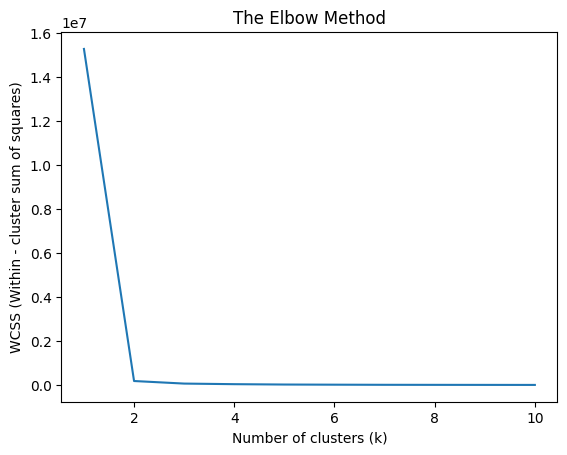

In [36]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 1)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss) #convention is always x (No. of clusters) vs y (wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS (Within - cluster sum of squares)")
plt.show()

#Training the K-Means clustering model on the dataset after finding the optimal k

In [37]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 1) #The Elbow Method indicated that the optimal k value is 2
y_pred = kmeans.fit_predict(x)  #We finally created the dependent variable (y)

In [38]:
print(y_pred) #These contains the cluster label assigned to each data point

[0 0 0 ... 0 0 0]


#Evaluating the clustering performance using Silhouette Score

In [39]:
from sklearn.metrics import silhouette_score
silhouette_score(x, y_pred)

np.float64(0.9991994226388664)

# Congratulations! We are done with our very first Unsupervised K-Means Clustering machine learning model.
